<h1 align='center'> বাংলায় মেশিন লার্নিংঃ লিনিয়ার রিগ্রেশন </h1>
<p align='center'> K M Shariat Ullah <br> Student, Dept. of Electrical and Electronic Engineering, Shahjalal University of Science and Technology, Sylhet <br> E-mail: cast.shariat@gamil.com </p>

মেশিন লার্নিং কী তা শুরুতে বলে দিলে বুঝার চেয়ে আরো বেশি তালগোল পাঁকানোর সুযোগ আছে। তাই আমরা আগে একটা উদাহরণ দেখব এবং সেখান থেকে মেশিন লার্নিং কী তা বোঝার চেষ্টা করব। ধরুন আপনার কাছে একটা ডাটাসেট আছে বাসাবাড়ির। এই ডাটাসেটে কোনো বাড়ির প্লটের ক্ষেত্রফলের সাথে ঐ বাড়ির দাম দেওয়া আছে। স্বাভাবিকভাবেই দেখতে পাচ্ছেন ক্ষেত্রফল বৃদ্ধি পেলে বাড়ির দামও বৃদ্ধি পাচ্ছে।

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('single_feature_house.csv')
data

,area,price
0,1.0,250
1,1.7,300
2,2.0,480
3,2.5,430
4,3.0,630
5,3.2,730


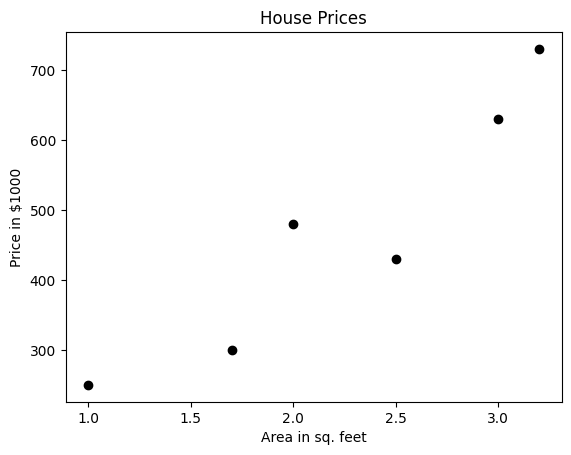

In [3]:
x = data.area
y = data.price
plt.scatter(x,y, color='black')
plt.title("House Prices")
plt.xlabel("Area in sq. feet")
plt.ylabel("Price in $1000")
plt.show()

এবার একটি প্রশ্ন করি, জমির ক্ষেত্রফল যদি $1.5$ sq. feet হয় তাহলে জমির দাম কত হবে? এই প্রশ্নটির উত্তর বের করার জন্য আমাদেরকে যা করতে হবে তা হলো এই বিন্দুগুলোকে ছেদ করবে এমন একটি রেখা আঁকতে হবে। পরে সেই রেখায় 1.5 বরাবর যে দাম দেওয়া আছে সেটাই হবে 1.5 স্কয়ারফুটের জন্য প্রেডিক্টেড প্রাইস। আমরা তাই এখন একটি সরলরেখা ফিট করব। শুধুমাত্র সর্বোচ্চ এবং সর্বনিম্ন বিন্দুকে ধরে যদি আমি রেখাটা আঁকি তাহলে রেখার সমীকরণ হবে - 

$$y = \frac{730-250}{3.2-1.0}x$$
$$\Rightarrow y =218.18x $$

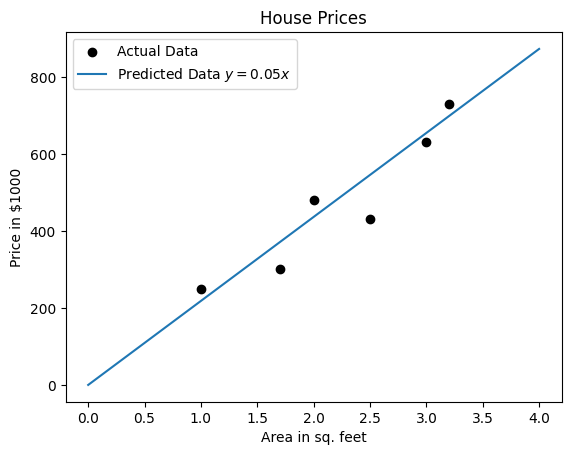

In [4]:
x_ = np.linspace(0, 4, 10)
y_ = 218.18*x_
plt.scatter(x,y, color='black', label='Actual Data')
plt.plot(x_,y_, label='Predicted Data $y=0.05x$')
plt.title("House Prices")
plt.xlabel("Area in sq. feet")
plt.ylabel("Price in $1000")
plt.legend()
plt.show()

<h4>Linear Regression</h4>

এবার আমরা শুরুতেই কিছু টার্মিনোলজির সাথে পরিচিত হয়ে নেই। এখানে $x$ অক্ষ বরাবর আমরা যে ডাটা দেওয়া আছে এগুলো হচ্ছে আমাদের ইনপুট ডাটা বা প্রদত্ত তথ্য, একে বলা হয় Feature। আর এই প্রদত্ত তথ্যের উপর ভিত্তি করে আমরা যা নির্ণয় করতে চাচ্ছি তা হচ্ছে Target। উপরের উদাহরণের ক্ষেত্রে Area in sq. feet: Feature এবং Price in USD 1000: Target। আমরা এই ডাটাকে স্যাটিসফাই করে এমন একটা সরলরেখা যে আঁকলাম এই সরলরেখার যে সমীকরণ $y = f(x) = 218.18x$ এটাকে বলা হয় মডেল। মেশিন লার্নিং এ বিভিন্ন ধরনের মডেল হতে পারে। এখানে আমরা যে মডেলটি ব্যবহার করছি তাকে বলা হয় `Linear Regression Single Feature Model`. এখানে আমরা সরলরেখা ফিট করতেছি মডেলটিতে, তাই এটি লিনিয়ার মডেল এবং এ সরলরেখাটি দিয়ে আমরা কোনো একটি ফিচারের 'মান বা Value' প্রেডিক্ট করার চেষ্টা করছি। তাই এটিকে বলা হবে রিগ্রেশন মডেল। আর এখানে ফিচার একটাই ইউজ করা হচ্ছে (Area in sq. feet) তাই এটিকে লিনিয়ার রিগ্রেশন সিঙ্গেল ফিচার মডেল ডাকা হচ্ছে। যদি একাধিক ফিচার ব্যবহার করা হতো তখন আমরা একে লিনিয়ার রিগ্রেশন মাল্টিপল ফিচার মডেল বলতাম। যদি একই ডাটাসেটকে আমরা সরলরেখা দিয়ে ফিট না করে বক্ররেখা দিয়ে ফিট করতাম তাহলে তাকে `Polynomial Regression Single Feature Model` ডাকা হতো। এসব নিয়ে পরে আবার কথা হবে। আপাতত আমরা লিনিয়ার রিগ্রেশন নিয়েই কথা বলব।

যদি $x$ সিঙ্গেল feature বিশিষ্ট $y$ Target বিশিষ্ট কোনো একটি মডেলকে আমরা এভাবে লিখব 

$$f_{w,b}(x) = wx+b \tag{1}$$

এখানে $w$ কে বলা হয় মডেলের weight আর $b$ কে বলা হয় মডেলের bias। এই মডেলে $x$ এর একটি মানের জন্য $y$ এর যে মান আমরা প্রেডিকশন করে বের করলাম তাকে $\hat{y}$ দিয়ে লেখা হয়। একে হাইপোথিসিস বলা হয়। এখানে এইযে (Feature, Target) এর ক্রমজোড় সেট, একে বলা হয় Single Training Example। যেমন উপরের টেবিলে (1.0, 250.00) বা (1.7, 300.00) এগুলোকে বলা হয় সিঙ্গেল ট্রেনিং এক্সাম্পল। এখানে খেয়াল করুন, যেহেতু ফিচার এবং টার্গেট সুন্দর করে লেভেল করে এরপর তা থেকে মডেল তৈরি করা হচ্ছে তাই একে বলা হয় সুপারভাইজড মেশিন লার্নিং। যদি লেভেলিং করা না থাকত তাহলে একে বলা হতো আনসুপারভাইজড মেশিন লার্নিং। এ রিপোজিটরিতে আমরা সুপারভাইজড মেশিন লার্নিং এ সীমাবদ্ধ থাকব। একজনরে - 

<p align='center'><img src='SupervisedML.png'></p>

<h4> Cost Function </h4>

কিছুক্ষণ আগে পাওয়া আমাদের ডাটাসেটকে ফিট করা লিনিয়ার রিগ্রেশন মডেলটি ছিল এমন $$\hat{y} = 218.18x$$ 
এখন আমরা যদি খেয়াল করি তাহলে দেখব বাস্তবের মান থেকে আমাদের প্রেডিক্ট করা মানের কিন্তু সামান্য তফাৎ আছে। নিচের চিত্রটি দেখলেই বুঝবেন 


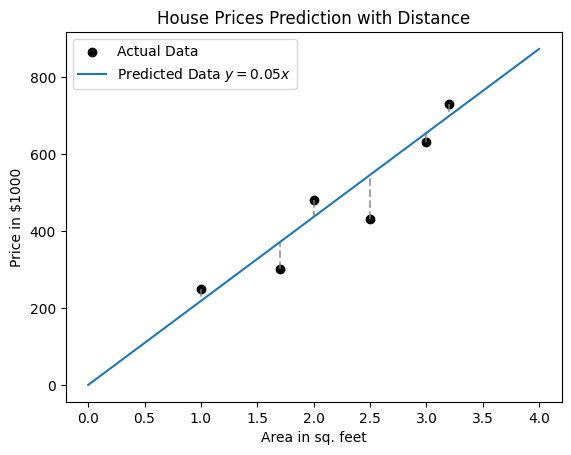

In [5]:
for xi, yi in zip(x, y):
    plt.plot([xi, xi], [yi, 218.18 * xi], '--', color='gray', alpha=0.7)
plt.scatter(x,y, color='black', label='Actual Data')
plt.plot(x_,y_, label='Predicted Data $y=0.05x$')
plt.title("House Prices Prediction with Distance")
plt.xlabel("Area in sq. feet")
plt.ylabel("Price in $1000")
plt.legend()
plt.show()


এখন এই দূরত্ব বা Error যত বেশি হবে ধরে নেওয়া হবে আমাদের মডেল তত বেশি খারাপ। এই দূরত্বগুলো বা Error যত বেশি, তত খারাপভাবে আমাদের মডেল ফিট হয়েছে। তাই মডেল ফিটিং-এর সময় আমরা চেষ্টা করব এই Error সবসময় সর্বনিম্ন রাখার জন্য। এই Error বের করার সবচেয়ে সহজ সূত্র হচ্ছে $\hat{y} - y$ এর মান বের করা। বস্তুত, এটিই এই ড্যাশ দিয়ে দেখানো লাইনটি বুঝায়। কিন্তু মেশিন লার্নিং এর ক্ষেত্রে আমরা Error আরেকটু ইফিশিয়েন্ট পদ্ধতিতে লেখার চেষ্টা করি। তখন এই দূরত্বকে বলা হয় Cost Function একে $J$ দিয়ে প্রকাশ করা হয়। এর সূত্র হচ্ছে - 

$$ J(w,b) = \frac{1}{2m} \sum_{i=1}^{m} | \hat{y}^i-y^i |^2 \tag{2}$$

এখানে আমরা Error কে স্কয়ার করে এরপর Cost Function বের করছি বলে একে `Squared Error Cost Function` বলে। একটু উদাহরণ দিয়ে বুঝাই। উপরের মডেল অনুসারে - 

| Area $x$ | Actual Price $y$ | Predicted Price $\hat{y} = 218.18x$ | $ \| \hat{y}-y \|^2$ |
|------| -----------------| -------------------------| ---------------|
| 1.0  | 250.00           | 218.18                   | 1012.51        |
| 1.7  | 300.00           | 370.91                   | 5028.2281      |
| 2.0  | 480.00           | 436.36                   | 1904.45        |
| 2.5  | 430.00           | 545.45                   | 13328.70       |
| 3.0  | 630.00           | 654.54                   | 602.21         |
| 3.2  | 730.00           | 698.18                   | 1012.51        | 

$J(218.18,0) = \frac{1}{2\times 6} (1012.51 + 5028.2281 + 1904.45 + 13328.70 + 602.21 + 1012.51) = 1907.38$

অর্থাৎ এই ডাটার জন্য $\hat{y} = 218.18x$ এই মডেলটির কস্ট ফাংশন 1907.38। এখন ভিন্ন আরেকটা মডেল চ্যুজ করতে হবে আমাদেরকে, সেক্ষেত্রে weight ও bias পরিবর্তন করে নিতে হবে। ধরি $\hat{y} = 220x + 25$ আমাদের নতুন মডেল। নিচে এ মডেলটির গ্রাফ দেখতে পাচ্ছেন। 


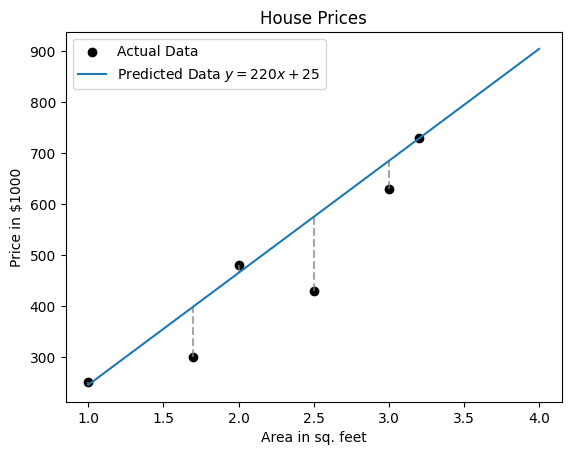

In [6]:
x_prime = np.linspace(1, 4, 10)
y_prime = 220*x_prime + 25

for xi, yi in zip(x, y):
    plt.plot([xi, xi], [yi, 220 * xi + 25], '--', color='gray', alpha=0.7)

plt.scatter(x,y, color='black', label='Actual Data')
plt.plot(x_prime,y_prime, label='Predicted Data $y=220x+25$')
plt.title("House Prices")
plt.xlabel("Area in sq. feet")
plt.ylabel("Price in $1000")
plt.legend()
plt.show()

$\hat{y} = 220x + 25$ এই মডেলের জন্য আমরা যদি কস্ট ফাংশন বের করতে চাই তাহলে টেবিলটি হবে - 

| Area $x$ | Actual Price $y$ | Predicted Price $\hat{y} = 220x+25$ | $ \| \hat{y}-y \|^2$ |
|------| -----------------| -------------------------| ---------------|
| 1.0  | 250.00           | 245.00                   | 25.00          |
| 1.7  | 300.00           | 399.00                   | 9801.00        |
| 2.0  | 480.00           | 465.00                   | 225.00         |
| 2.5  | 430.00           | 575.00                   | 21025.00       |
| 3.0  | 630.00           | 685.00                   | 3025.00        |
| 3.2  | 730.00           | 729.00                   | 1.00           | 

$J(0.03,25) = \frac{1}{2\times 6} (25.00 + 9801.00 + 225.00 + 21025.00 + 3025.00 + 1.00) = 2841.83$ 
যেহেতু এই মডেলটির কস্ট ফাংশন আগের থেকে বেশি তাই এই মডেলটি আগের থেকে বাজে কাজ করছে। এটি ভালো মডেল না। খেয়াল রাখতে হবে, এখানে আমরা স্কয়ারড এরর কস্ট ফাংশন বের করেছি। এটি ছাড়াও আরো অনেক প্রকারের কস্ট ফাংশন রয়েছে। তবে বোঝার সুবিধার্থে ও সার্বজনীন হওয়ায় আমরা রিগ্রেশনের ক্ষেত্রে এই স্কয়ারড এরর কস্ট ফাংশন দিয়েই সবকিছু হিসাব করব। 

<h4>Gradient Descent</h4>

উপরে আমরা দুইটা কস্ট ফাংশন বের করে দেখলাম। শুরুতেই বলেছি আমাদের উদ্দেশ্য হচ্ছে মডেলের কস্ট ফাংশন সর্বনিম্ন করা। একটা ফাংশনের সর্বোচ্চ মান বা সর্বনিম্ন মান বের করার জন্য আমরা অন্তরীকরণ ব্যবহার করে থাকি। এখানেও কস্ট ফাংশনের মান সর্বনিম্ন কত হবে তা বের করার জন্য আমরা অন্তরীকরণ ব্যবহার করব। গ্রেডিয়েন্ট ডিসেন্ট ব্যবহার করে আমরা $w$ ও $b$ এর সর্বোনিম্ন মান বের করতে পারব। এর জন্য সূত্র হবে - 

$$w^{j+1} = w^{j} - \alpha \frac{\partial}{\partial w^j} J(w^j,b) \tag{3}$$

এখানে $w^{j+1} $ হচ্ছে আপডেট করা নতুন weight $w^j$ হচ্ছে বর্তমান মডেলে থাকা weight আর $\alpha$ কে বলা হয় `learning rate` গ্রেডিয়েন্ট ডিসেন্ট কত দ্রুত বা ধীরে কনভার্জ করবে বা কত কম স্টেপে মিনিমাম মান বের করবে তা ঠিক করে দেয়। $\alpha$ এর মান খুব বড়ও সিলেক্ট করা যাবে না আবার খুব ছোটও সিলেক্ট করা যাবে না। 

$$ \frac{\partial}{\partial w} J(w,b) = \frac{1}{m} \sum_{i=0}^{m} \left[ f_{w,b}(x^i) - y^i \right ] x^i \tag{4}$$

একই পদ্ধতিতে 

$$ b^{j+1} = b^{j} - \alpha \frac{\partial}{\partial b^j} J(w, b^j) \tag{5} $$
$$ \frac{\partial}{\partial b} J(w,b) = \frac{1}{m} \sum_{i=0}^{m} \left[ f_{w,b}(x^i) - y^i \right ] \tag{6} $$

এই আপডেট করা weight এবং bias কে ব্যবহার করে এর মান আরো আপডেট করতে হবে। এভাবে ইটারেশন চালাতে হবে ততক্ষণ পর্যন্ত, যতক্ষণ না এর মান কনভার্জ করে। কোডের মাধ্যমে যদি লিখতে চাই তবে - 

In [7]:
x = np.array([1.0, 1.7, 2.0, 2.5, 3.0, 3.2])
y = np.array([250, 300, 480,  430,   630, 730])

# Initial parameters
w = 0  # Initial weight
b = 0  # Initial bias
a = 0.01  # Learning rate
m = len(x)  # Number of data points

# Gradient descent
for _ in range(1000):  
    h = w * x + b 
    dj_dw = np.sum((h - y) * x) / m  
    dj_db = np.sum(h - y) / m  
    w = w - a * dj_dw  
    b = b - a * dj_db 

# Print results
print(f"Optimal weight (w): {w:.4f}")
print(f"Optimal base (b): {b:.4f}")


Optimal weight (w): 197.4360
Optimal base (b): 31.6585


অর্থাৎ, আমি যদি $\hat{y} = 197.4360x + 31.6585$ এই মডেল ইউজ করি তাহলে কস্ট ফাংশন সর্বনিম্ন হবে এবং তখন মডেলটিতে সবচেয়ে ভালোভাবে প্রেডিকশন করতে পারবে। এই রেখাকে `Best Fit Curve` বলে। এইযে একটা ডাটাসেটের উপর বেস্ট ফিট মডেল খুঁজে বের করা, এটাই আমাদের সুপারভাইজড মেশিন লার্নিং এর লিনিয়ার রিগ্রেশন।